In [1]:
# First, some imports
import os
import datetime as dt
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display

np.random.seed(19760812)
plt.style.use('bmh')
%matplotlib inline







# We read data from 'model.txt'
ipath = os.path.join('D:\git', 'model.txt')

In [2]:
model = pd.read_csv(ipath, delim_whitespace = True, skiprows = 3,
                    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277800 entries, 1984-01-01 00:00:00 to 2015-09-10 23:00:00
Data columns (total 7 columns):
M(m/s)      277800 non-null float64
D(deg)      277800 non-null int64
T(C)        277800 non-null float64
De(k/m3)    277800 non-null float64
PRE(hPa)    277800 non-null float64
RiNumber    277800 non-null float64
RH(%)       277800 non-null float64
dtypes: float64(6), int64(1)
memory usage: 17.0 MB


C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D5166940>,
      dtype=object)

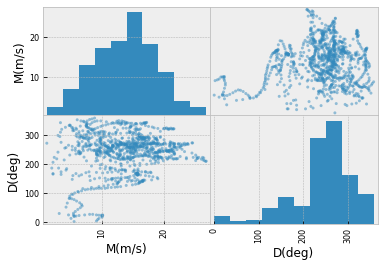

In [4]:
pd.plotting.scatter_matrix(model.ix[0:1000, 'M(m/s)':'D(deg)'])

In [5]:
print(model.index[0], model.index[-1], sep = '\n')

1984-01-01 00:00:00
2015-09-10 23:00:00


In [6]:
model.mean()

M(m/s)         9.687760
D(deg)       193.255356
T(C)          10.141485
De(k/m3)       1.234480
PRE(hPa)    1003.027897
RiNumber     -25.652371
RH(%)         81.634157
dtype: float64

In [7]:
model.max()

M(m/s)         32.40
D(deg)        360.00
T(C)           30.80
De(k/m3)        1.33
PRE(hPa)     1032.40
RiNumber    93738.27
RH(%)         100.00
dtype: float64

In [8]:
idx = model.loc[:, 'M(m/s)'].sort_values(ascending = False).index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D5029940>,
      dtype=object)

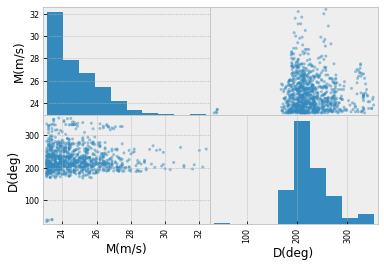

In [9]:
pd.plotting.scatter_matrix(model.loc[idx[:1000], 'M(m/s)':'D(deg)'])

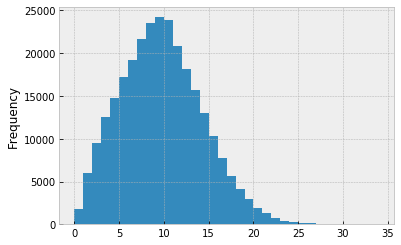

In [10]:
model.loc[:, 'M(m/s)'].plot.hist(bins = np.arange(0, 35))

In [11]:
model['month'] = model.index.month
model['year'] = model.index.year

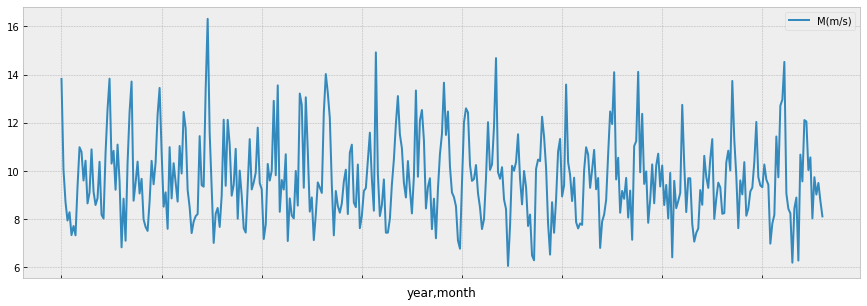

In [12]:
model.groupby(by = ['year', 'month']).mean().plot(y = 'M(m/s)', figsize = (15, 5))

In [13]:
monthly = model.groupby(by = ['year', 'month']).mean()
monthly['ma'] = monthly.loc[:, 'M(m/s)'].rolling(5, center = True).mean()
monthly.head()

M(m/s)      D(deg)      T(C)  De(k/m3)     PRE(hPa)   RiNumber  \
year month                                                                      
1984 1      13.821505  233.603495  4.621505  1.247419   993.974328  -2.823320   
     2      10.043534  164.089080  3.522701  1.269368  1007.659339 -29.335790   
     3       8.708199  153.081989  4.138306  1.261425  1003.437231   0.250726   
     4       7.939583  162.113889  6.781111  1.255986  1008.487083  -1.655014   
     5       8.283871  123.590054  8.034677  1.238763   998.939113  -0.384704   

                RH(%)        ma  
year month                       
1984 1      81.038575       NaN  
     2      83.860201       NaN  
     3      84.740591  9.759339  
     4      74.165417  8.461204  
     5      87.813306  7.994621

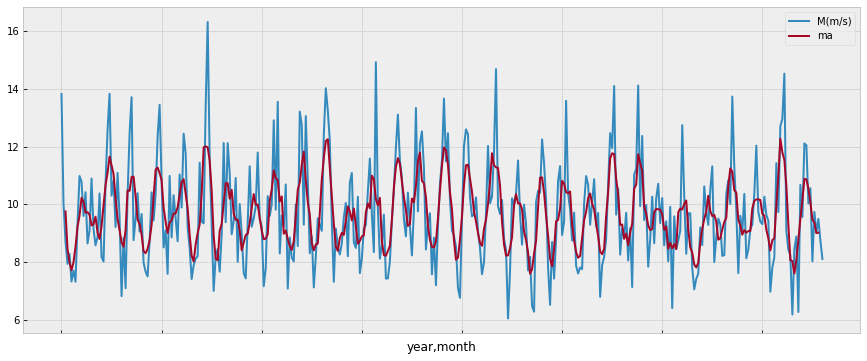

In [14]:
monthly.loc[:,['M(m/s)', 'ma']].plot(figsize = (15, 6))

In [15]:
monthly.loc[:, 'M(m/s)'].reset_index().pivot(index = 'year', columns = 'month')

M(m/s)                                                         \
month         1          2          3          4          5          6    
year                                                                      
1984   13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985   10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986   13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987    8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988   12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989    9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990   13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991   11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992    9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993   13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994   12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995   14.024866  13.239137  12.197043   9.416944   7.321909   9.166389   
1996   10.754839  11.089511   8.685753   8.493611  10.265726   7.620417   
1997    8.347715  14.924107   9.867876   8.124444   8.584274   9.646667   
1998   13.109677  11.514286  10.942339   9.500417   8.895833  10.409583   
1999   12.528763  11.269048   8.439247   9.330000   9.694220   7.580694   
2000   11.494892  12.468247  10.172715   9.103472   8.910349   8.529167   
2001   10.253495   9.584673   9.664516  10.243333   9.074731   8.480000   
2002   11.843817  14.686756   9.946237   9.673611  10.154435   8.813611   
2003   11.521909   9.675744   8.608065   9.995833   9.328091   7.710972   
2004   12.250134  11.419828  10.138710   7.813889   6.522446   8.699167   
2005   13.587500  10.366071   9.831720   8.748194   9.718414   7.874444   
2006    9.297984  10.054167  10.873118   9.237639   9.704032   6.799444   
2007   14.101075   9.645387  10.546640   8.262500   9.168145   8.840694   
2008   14.116129   9.943103  12.370161   9.460139   9.980376   7.843889   
2009   10.223387   8.581101   9.415591   8.026250   9.916532   6.409583   
2010    8.289919   9.695387   9.692876   7.802083   7.061559   7.421528   
2011   10.500941  11.319940   8.006317   8.849028   9.512500   9.312500   
2012   11.287500   9.791810   7.621102   9.605000   9.024597  10.365000   
2013    9.740323   9.398512   9.320027  10.267222   9.640860   9.429167   
2014   12.961156  14.528125   9.064785   8.428750   8.235349   6.188056   
2015   12.050134  10.035863  10.561156   8.027083   9.739382   9.018056   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
1984    7.710618   7.324194   9.335694  10.985215  10.789306   9.600941  
1985    8.865860  10.379704   8.181250   8.021640  10.734167  12.567339  
1986    6.824866   8.847043   7.099028  10.331855  12.446944  13.712500  
1987    7.672312   7.507796   8.731528  10.418011   9.445417  10.355376  
1988   10.986022   8.857124  10.319167   9.518683   8.726111  11.036559  
1989    7.892876   8.117876   8.210139  11.445430   9.406389   9.345430  
1990    8.460618   7.672581   8.973333  12.126210   9.382361  12.120161  
1991    8.981317   7.620565   7.437778   9.339382  11.320278   9.228898  
1992    7.781048  10.290054   9.600278  10.010215  12.911806   9.820027  
1993    8.857527   8.148925   8.027778   9.998925   8.559306  13.214651  
1994    7.125806   8.196505   9.523194   9.311290   9.085000  12.423925  
1995    8.548118   8.264382   8.653056   9.555376  10.049861   8.207661  
1996    8.129167   9.162634   9.287639  10.456048  11.589306   9.658468  
1997    7.433871   7.436156   8.018889   9.434005  10.480139  11.958468  
1998    9.251882   8.233871   9.785556  13.341532   9.758194  12.096640  
1999    8.846640   7.202285   9.258333  10.698253  1

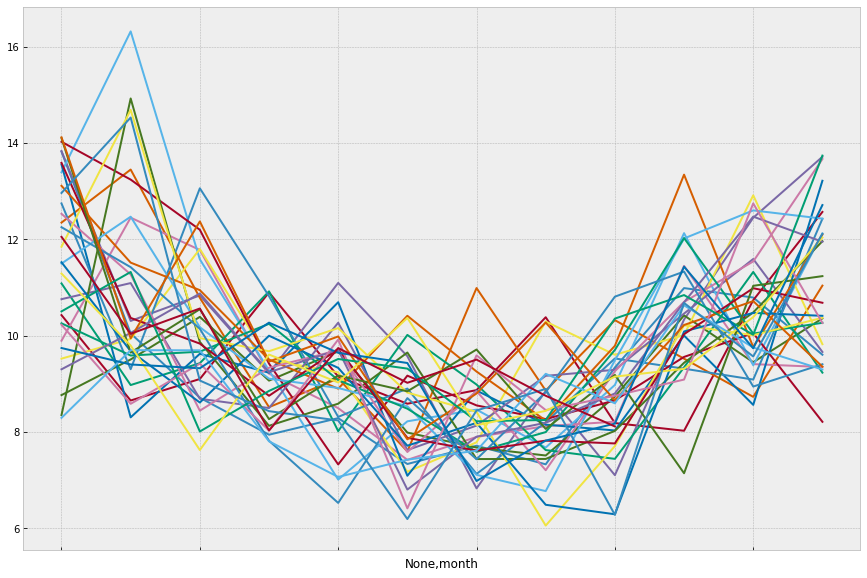

In [16]:
(monthly.loc[:, 'M(m/s)'].reset_index().pivot(
    index = 'year', 
        columns = 'month'
    ).T.plot(
        figsize = (15, 10), 
        legend = False
    )
 )

# 2

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19760812)
%matplotlib inline

In [18]:
s = pd.Series()

df = pd.DataFrame()


p = pd.Panel()



In [19]:
print(s, df, p, sep = '\n' * 2)

Series([], dtype: float64)

Empty DataFrame
Columns: []
Index: []

<class 'pandas.core.panel.Panel'>
Dimensions: 0 (items) x 0 (major_axis) x 0 (minor_axis)
Items axis: None
Major_axis axis: None
Minor_axis axis: None


In [20]:
s = pd.Series({'a' : 1000, 'b' : 2000, 'c' : 3000, 'd' : 4000})

In [21]:

s['b']

2000

In [22]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same length as `data`.
 |      Non-unique index valu

In [23]:
lista = [1,10,100,1000]
dicc = {'a': 1, 'b': 10, 'c': 100, 'd': 1000}

In [24]:
# create a series from a list
s1 = pd.Series(data = lista, index = ['a','b','c','d'], name = 'My Series')

In [25]:
# create a series from a dict
s2 = pd.Series(data = dicc, name = 'My Series')

In [26]:
s1

a       1
b      10
c     100
d    1000
Name: My Series, dtype: int64

In [27]:
s2

a       1
b      10
c     100
d    1000
Name: My Series, dtype: int64

In [28]:
s1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
s2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [30]:
s1.values

array([   1,   10,  100, 1000], dtype=int64)

# To access an element, we can do it as with a dict
s1['a']

In [31]:
# or like a numpy array
s1[0]

1

In [32]:
s1[0:3]

a      1
b     10
c    100
Name: My Series, dtype: int64

In [33]:
s1['a':'c']

a      1
b     10
c    100
Name: My Series, dtype: int64

In [34]:
# Swe can add new elements like a dict
s1['e'] = 10000

In [35]:
s1

a        1
b       10
c      100
d     1000
e    10000
Name: My Series, dtype: int64

In [36]:
s2

a       1
b      10
c     100
d    1000
Name: My Series, dtype: int64

In [37]:
s1 / 10

a       0.1
b       1.0
c      10.0
d     100.0
e    1000.0
Name: My Series, dtype: float64

In [38]:
s1 + s2


a       2.0
b      20.0
c     200.0
d    2000.0
e       NaN
Name: My Series, dtype: float64

In [39]:

df = pd.DataFrame(np.random.randn(10, 3), columns = ['col1', 'col2', 'col3'])

In [40]:
df

,col1,col2,col3
0,-0.020505,1.308068,1.424616
1,-1.130040,0.538492,1.278070
2,-0.191611,0.506448,-1.213978
3,1.287087,-0.482319,-0.720435
4,-0.158823,-0.090531,0.650967
5,0.257940,0.145686,1.664884
6,-0.699465,0.253797,-0.006276
7,0.194446,-0.229804,1.831084
8,0.601042,0.904607,-2.970516
9,0.725665,-0.357503,-0.062005


In [41]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force. Only a single dtype is allowed. If Non

In [42]:
df['col1']

0   -0.020505
1   -1.130040
2   -0.191611
3    1.287087
4   -0.158823
5    0.257940
6   -0.699465
7    0.194446
8    0.601042
9    0.725665
Name: col1, dtype: float64

In [43]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [44]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [45]:
help(pd.Panel)

Help on class Panel in module pandas.core.panel:

class Panel(pandas.core.generic.NDFrame)
 |  Represents wide format panel data, stored as 3-dimensional array
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (items x major x minor), or dict of DataFrames
 |  items : Index or array-like
 |      axis=0
 |  major_axis : Index or array-like
 |      axis=1
 |  minor_axis : Index or array-like
 |      axis=2
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, default False
 |      Copy data from inputs. Only affects DataFrame / 2d ndarray input
 |  
 |  Method resolution order:
 |      Panel
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      # work only for scalars
 |  
 |  __and__(self, other)
 |      # work o

In [46]:
pd.Panel

pandas.core.panel.Panel

# 3

In [47]:
# First, imports
import os
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(19760812)
%matplotlib inline


ipath = os.path.join('D:\git', 'mast.txt')
wind = pd.read_csv(ipath)
wind.head(3)

,130904 0000 2.21 2.58 113.5 999.99 999.99 99.99 9999.99 9999.99 0.11
0,130904 0010 1.69 2.31 99.9 999.99 999.99 ...
1,130904 0020 1.28 1.50 96.0 999.99 999.99 ...
2,130904 0030 1.94 2.39 99.2 999.99 999.99 ...


In [48]:
wind = pd.read_csv(ipath,  delim_whitespace = True)
# When we work with text separated by whitespaces we can use the keyword delim_whitespace:
# wind = pd.read_csv(path, delim_whitespace = True)
wind.head(3)

,130904,0000,2.21,2.58,113.5,999.99,999.99.1,99.99,9999.99,9999.99.1,0.11
0,130904,10,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
1,130904,20,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08
2,130904,30,1.94,2.39,99.2,999.99,999.99,99.99,9999.99,9999.99,0.26


In [49]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols)
wind.head(3)

,Date,time,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
0,130904,0,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
1,130904,10,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2,130904,20,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [50]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols,
                   parse_dates = [[0, 1]])
wind.head(3)

,Date_time,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
0,2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
1,2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2,2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [51]:

cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols,
                   parse_dates = [[0, 1]], index_col = 0)
wind.head(3)

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [52]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols,
                   parse_dates = {'timestamp': [0, 1]}, index_col = 0)
wind.head(3)

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
timestamp,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [53]:
# The previous code is equivalent to
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols,
                   parse_dates = [[0, 1]], index_col = 0)
wind.index.name = 'Timestamp'
wind.head(3)

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Timestamp,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [54]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)


In [55]:

tmp = pd.DataFrame([1,10,100, 1000], index = [1,1,2,2], columns = ['values'])

In [56]:
tmp

,values
1,1
1,10
2,100
2,1000


In [57]:
print(tmp['values'][1], tmp['values'][2], sep = '\n')

1     1
1    10
Name: values, dtype: int64
2     100
2    1000
Name: values, dtype: int64


In [58]:
# An example with error in dates:

index = [
    '01/01/2015 00:00',
    '02/01/2015 00:00',
    '03/01/2015 00:00',
    '04/01/2015 00:00',
    '05/01/2015 00:00',
    '06/01/2015 00:00',
    '07/01/2015 00:00',
    '08/01/2015 00:00',
    '09/01/2015 00:00',
    '10/01/2015 00:00',
    '11/01/2015 00:00',
    '12/01/2015 00:00',
    '13/01/2015 00:00',
    '14/01/2015 00:00',
    '15/01/2015 00:00'
]
values = np.random.randn(len(index))

tmp = pd.DataFrame(values, index = pd.to_datetime(index), columns = ['col1'])

,col1
2015-01-01,-0.020505
2015-02-01,1.308068
2015-03-01,1.424616
2015-04-01,-1.130040
2015-05-01,0.538492
2015-06-01,1.278070
2015-07-01,-0.191611
2015-08-01,0.506448
2015-09-01,-1.213978
2015-10-01,1.287087


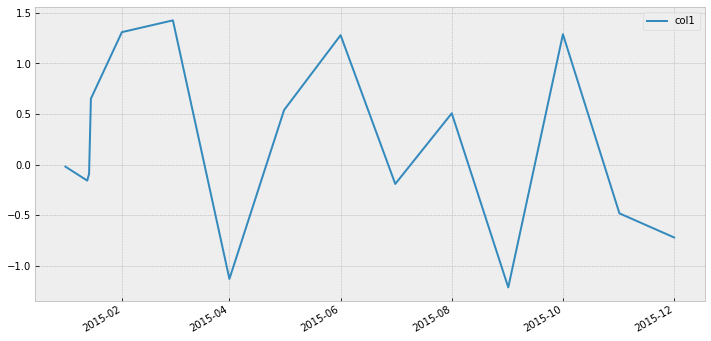

In [59]:
display(tmp)
tmp.plot.line(figsize = (12, 6))

In [60]:
import datetime as dt
import io

def dateparser(date):
    date, time = date.split()
    DD, MM, YY = date.split('/')
    hh, mm = time.split(':')
    return dt.datetime(int(YY), int(MM), int(DD), int(hh), int(mm))

virtual_file = io.StringIO("""01/01/2015 00:00, 1
02/01/2015 00:00, 2
03/01/2015 00:00, 3
04/01/2015 00:00, 4
05/01/2015 00:00, 5
06/01/2015 00:00, 6
07/01/2015 00:00, 7
08/01/2015 00:00, 8
09/01/2015 00:00, 9
10/01/2015 00:00, 10
11/01/2015 00:00, 11
12/01/2015 00:00, 12
13/01/2015 00:00, 13
14/01/2015 00:00, 14
15/01/2015 00:00, 15
""")

tmp_wrong = pd.read_csv(virtual_file, parse_dates = [0], index_col = 0, names = ['Date', 'values'])

virtual_file = io.StringIO("""01/01/2015 00:00, 1
02/01/2015 00:00, 2
03/01/2015 00:00, 3
04/01/2015 00:00, 4
05/01/2015 00:00, 5
06/01/2015 00:00, 6
07/01/2015 00:00, 7
08/01/2015 00:00, 8
09/01/2015 00:00, 9
10/01/2015 00:00, 10
11/01/2015 00:00, 11
12/01/2015 00:00, 12
13/01/2015 00:00, 13
14/01/2015 00:00, 14
15/01/2015 00:00, 15
""")

tmp_right = pd.read_csv(virtual_file, parse_dates = True, index_col = 0, names = ['Date', 'values'],
                        date_parser = dateparser)

In [61]:
display(tmp_wrong)
display(tmp_right)

,values
Date,
2015-01-01,1
2015-02-01,2
2015-03-01,3
2015-04-01,4
2015-05-01,5
2015-06-01,6
2015-07-01,7
2015-08-01,8
2015-09-01,9


,values
Date,
2015-01-01,1
2015-01-02,2
2015-01-03,3
2015-01-04,4
2015-01-05,5
2015-01-06,6
2015-01-07,7
2015-01-08,8
2015-01-09,9


In [62]:
opath = os.path.join('D:\git', 'mast_2.csv')
#wind.to_csv(opath)
wind.iloc[0:100].to_csv(opath)

In [63]:
#wind.to_json(opath.replace('csv', 'json'))
wind.iloc[0:100].to_json(opath.replace('csv', 'json'))

In [64]:
# Si son muchos datos no os lo recomiendo, es lento
#wind.to_html(opath.replace('csv', 'html'))
wind.iloc[0:100].to_html(opath.replace('csv', 'html'))

In [65]:
writer = pd.ExcelWriter(opath.replace('csv', 'xlsx'))
#wind.to_excel(writer, sheet_name= "Mi hoja 1")
wind.iloc[0:100].to_excel(writer, sheet_name= "Mi hoja 1")
writer.save()

In [66]:

# Now that we have files with json, html, xlsx,..., formats you can practice what we have learn opening them
# using the pd.read_* functions

# 4

In [67]:
# first, the imports
import os
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(19760812)
%matplotlib inline

In [68]:
# We read the data in the file 'mast.txt'
ipath = os.path.join('D:\git', 'mast.txt')

def dateparse(date, time):
    YY = 2000 + int(date[:2])
    MM = int(date[2:4])
    DD = int(date[4:])
    hh = int(time[:2])
    mm = int(time[2:])
    
    return dt.datetime(YY, MM, DD, hh, mm, 0)
    

cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols, 
                   parse_dates = [[0, 1]], index_col = 0,
                   date_parser = dateparse)

In [69]:
wind[0:10]

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08
2013-09-04 00:30:00,1.94,2.39,99.2,999.99,999.99,99.99,9999.99,9999.99,0.26
2013-09-04 00:40:00,2.17,2.67,108.4,999.99,999.99,99.99,9999.99,9999.99,0.23
2013-09-04 00:50:00,2.25,2.89,105.0,999.99,999.99,99.99,9999.99,9999.99,0.35
2013-09-04 01:00:00,2.66,2.96,114.4,999.99,999.99,99.99,9999.99,9999.99,0.12
2013-09-04 01:10:00,3.55,4.33,119.1,999.99,999.99,99.99,9999.99,9999.99,0.46
2013-09-04 01:20:00,4.26,4.50,122.1,999.99,999.99,99.99,9999.99,9999.99,0.08


In [70]:

wind['2013-09-04 00:00:00':'2013-09-04 01:30:00']

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08
2013-09-04 00:30:00,1.94,2.39,99.2,999.99,999.99,99.99,9999.99,9999.99,0.26
2013-09-04 00:40:00,2.17,2.67,108.4,999.99,999.99,99.99,9999.99,9999.99,0.23
2013-09-04 00:50:00,2.25,2.89,105.0,999.99,999.99,99.99,9999.99,9999.99,0.35
2013-09-04 01:00:00,2.66,2.96,114.4,999.99,999.99,99.99,9999.99,9999.99,0.12
2013-09-04 01:10:00,3.55,4.33,119.1,999.99,999.99,99.99,9999.99,9999.99,0.46
2013-09-04 01:20:00,4.26,4.50,122.1,999.99,999.99,99.99,9999.99,9999.99,0.08


In [71]:
wind['wspd'].head(3)

Date_time
2013-09-04 00:00:00    2.21
2013-09-04 00:10:00    1.69
2013-09-04 00:20:00    1.28
Name: wspd, dtype: float64

In [72]:
wind.wspd.head(3)

Date_time
2013-09-04 00:00:00    2.21
2013-09-04 00:10:00    1.69
2013-09-04 00:20:00    1.28
Name: wspd, dtype: float64

In [73]:
df1 = pd.DataFrame(np.random.randn(5,2), columns = [1, 5,])
df1

,1,5
0,-0.020505,1.308068
1,1.424616,-1.130040
2,0.538492,1.278070
3,-0.191611,0.506448
4,-1.213978,1.287087


In [74]:
df1[1]

0   -0.020505
1    1.424616
2    0.538492
3   -0.191611
4   -1.213978
Name: 1, dtype: float64

In [75]:
# Create a Series
wspd = wind['wspd']

In [76]:
# Access the elements located at positions 0, 100 and 1000
print(wspd[[0, 100, 1000]])
print('\n' * 3)

# Using indexes at locations 0, 100 and 1000
idx = wspd[[0, 100, 1000]].index
print(idx)
print('\n' * 3)

# We access the same elements than initially but using the labels instead 
# the location of the elements
print(wspd[idx])

Date_time
2013-09-04 00:00:00     2.21
2013-09-04 16:40:00     7.45
2013-09-10 22:40:00    18.70
Name: wspd, dtype: float64




DatetimeIndex(['2013-09-04 00:00:00', '2013-09-04 16:40:00',
               '2013-09-10 22:40:00'],
              dtype='datetime64[ns]', name='Date_time', freq=None)




Date_time
2013-09-04 00:00:00     2.21
2013-09-04 16:40:00     7.45
2013-09-10 22:40:00    18.70
Name: wspd, dtype: float64


In [77]:
idx = wind['wspd'] > 35


In [78]:
wind[idx]

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-10-28 08:30:00,36.94,44.31,224.6,999.99,999.99,99.99,9999.99,9999.99,3.07
2013-10-28 08:40:00,35.77,42.72,226.8,999.99,999.99,99.99,9999.99,9999.99,2.56


In [79]:
idx = (wind['wspd'] > 35) & (wind['wdir'] > 225)
wind[idx]

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-10-28 08:40:00,35.77,42.72,226.8,999.99,999.99,99.99,9999.99,9999.99,2.56


In [80]:
# To make it more efficient you should install 'numexpr'
# tht is the default engine. If you don't have it installed
# and you don't define the engine ('python') you will get an ImportError
wind.query('wspd > 35 and wdir > 225', engine = 'python')

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-10-28 08:40:00,35.77,42.72,226.8,999.99,999.99,99.99,9999.99,9999.99,2.56


In [81]:
s1 = pd.Series(np.arange(0,10), index = np.arange(0,10))
s2 = pd.Series(np.arange(10,20), index = np.arange(5,15))
print(s1)
print(s2)

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32
5     10
6     11
7     12
8     13
9     14
10    15
11    16
12    17
13    18
14    19
dtype: int32


In [82]:
s1 + s2

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5     15.0
6     17.0
7     19.0
8     21.0
9     23.0
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
dtype: float64

In [83]:

wind['wspd_std']

Date_time
2013-09-04 00:00:00    0.11
2013-09-04 00:10:00    0.35
2013-09-04 00:20:00    0.08
2013-09-04 00:30:00    0.26
2013-09-04 00:40:00    0.23
2013-09-04 00:50:00    0.35
2013-09-04 01:00:00    0.12
2013-09-04 01:10:00    0.46
2013-09-04 01:20:00    0.08
2013-09-04 01:30:00    0.23
2013-09-04 01:40:00    0.16
2013-09-04 01:50:00    0.17
2013-09-04 02:00:00    0.12
2013-09-04 02:10:00    0.14
2013-09-04 02:20:00    0.35
2013-09-04 02:30:00    0.22
2013-09-04 02:40:00    0.17
2013-09-04 02:50:00    0.12
2013-09-04 03:00:00    0.16
2013-09-04 03:10:00    0.08
2013-09-04 03:20:00    0.10
2013-09-04 03:30:00    0.21
2013-09-04 03:40:00    0.08
2013-09-04 03:50:00    0.13
2013-09-04 04:00:00    0.15
2013-09-04 04:10:00    0.11
2013-09-04 04:20:00    0.10
2013-09-04 04:30:00    0.15
2013-09-04 04:40:00    0.17
2013-09-04 04:50:00    0.20
                       ... 
2015-09-03 07:10:00    0.43
2015-09-03 07:20:00    0.52
2015-09-03 07:30:00    0.53
2015-09-03 07:40:00    0.49
2015-09-03

In [84]:

wind[['wspd', 'wspd_std']]

,wspd,wspd_std
Date_time,,
2013-09-04 00:00:00,2.21,0.11
2013-09-04 00:10:00,1.69,0.35
2013-09-04 00:20:00,1.28,0.08
2013-09-04 00:30:00,1.94,0.26
2013-09-04 00:40:00,2.17,0.23
2013-09-04 00:50:00,2.25,0.35
2013-09-04 01:00:00,2.66,0.12
2013-09-04 01:10:00,3.55,0.46
2013-09-04 01:20:00,4.26,0.08


In [85]:
wind['2015/01/01 00:00':'2015/01/01 02:00']

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2015-01-01 00:00:00,14.81,16.67,219.4,999.99,999.99,99.99,9999.99,9999.99,0.64
2015-01-01 00:10:00,15.67,17.31,221.4,999.99,999.99,99.99,9999.99,9999.99,0.56
2015-01-01 00:20:00,15.96,17.63,224.5,999.99,999.99,99.99,9999.99,9999.99,0.74
2015-01-01 00:30:00,15.36,17.05,220.7,999.99,999.99,99.99,9999.99,9999.99,0.74
2015-01-01 00:40:00,15.62,17.41,224.6,999.99,999.99,99.99,9999.99,9999.99,0.72
2015-01-01 00:50:00,15.22,16.97,225.4,999.99,999.99,99.99,9999.99,9999.99,0.84
2015-01-01 01:00:00,15.64,16.98,216.4,999.99,999.99,99.99,9999.99,9999.99,0.52
2015-01-01 01:10:00,15.00,17.07,216.2,999.99,999.99,99.99,9999.99,9999.99,0.80
2015-01-01 01:20:00,14.54,16.46,218.2,999.99,999.99,99.99,9999.99,9999.99,0.73


In [86]:
#o the following will provide an error:

#wind['wspd':'wdir']

In [87]:
wind[['wspd':'wdir']]

SyntaxError: invalid syntax (<ipython-input-87-2b20945df5bb>, line 1)

In [88]:
wind.loc['2013-09-04 00:00:00':'2013-09-04 00:20:00', 'wspd':'wspd_max']

,wspd,wspd_max
Date_time,,
2013-09-04 00:00:00,2.21,2.58
2013-09-04 00:10:00,1.69,2.31
2013-09-04 00:20:00,1.28,1.50


In [89]:
wind.iloc[0:3, 0:2] # similar to indexing a numpy arrays wind.values[0:3, 0:2]

,wspd,wspd_max
Date_time,,
2013-09-04 00:00:00,2.21,2.58
2013-09-04 00:10:00,1.69,2.31
2013-09-04 00:20:00,1.28,1.50


In [90]:
wind.ix[0:3, 'wspd':'wspd_max']

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,wspd,wspd_max
Date_time,,
2013-09-04 00:00:00,2.21,2.58
2013-09-04 00:10:00,1.69,2.31
2013-09-04 00:20:00,1.28,1.50


In [91]:
wind[0:3][['wspd', 'wspd_max']]

,wspd,wspd_max
Date_time,,
2013-09-04 00:00:00,2.21,2.58
2013-09-04 00:10:00,1.69,2.31
2013-09-04 00:20:00,1.28,1.50


In [92]:

wind[['wspd', 'wspd_max']][0:3]

,wspd,wspd_max
Date_time,,
2013-09-04 00:00:00,2.21,2.58
2013-09-04 00:10:00,1.69,2.31
2013-09-04 00:20:00,1.28,1.50


In [93]:
wind.between_time('00:00', '00:30').head(20)

,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08
2013-09-04 00:30:00,1.94,2.39,99.2,999.99,999.99,99.99,9999.99,9999.99,0.26
2013-09-05 00:00:00,12.97,13.40,123.0,999.99,999.99,99.99,9999.99,9999.99,0.16
2013-09-05 00:10:00,12.94,13.31,124.3,999.99,999.99,99.99,9999.99,9999.99,0.13
2013-09-05 00:20:00,12.87,13.40,124.7,999.99,999.99,99.99,9999.99,9999.99,0.30
2013-09-05 00:30:00,12.50,13.12,125.6,999.99,999.99,99.99,9999.99,9999.99,0.22
2013-09-06 00:00:00,6.07,6.47,197.4,999.99,999.99,99.99,9999.99,9999.99,0.17


In [94]:
# It also works with series:
wind['wspd'].between_time('00:00', '00:30').head(20)

Date_time
2013-09-04 00:00:00     2.21
2013-09-04 00:10:00     1.69
2013-09-04 00:20:00     1.28
2013-09-04 00:30:00     1.94
2013-09-05 00:00:00    12.97
2013-09-05 00:10:00    12.94
2013-09-05 00:20:00    12.87
2013-09-05 00:30:00    12.50
2013-09-06 00:00:00     6.07
2013-09-06 00:10:00     9.04
2013-09-06 00:20:00    10.11
2013-09-06 00:30:00     9.44
2013-09-07 00:00:00     9.52
2013-09-07 00:10:00     9.51
2013-09-07 00:20:00     9.75
2013-09-07 00:30:00     9.33
2013-09-08 00:00:00     5.66
2013-09-08 00:10:00     5.50
2013-09-08 00:20:00     5.61
2013-09-08 00:30:00     5.79
Name: wspd, dtype: float64

# 5

In [95]:
# First, the imports
import os
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(19760812)
%matplotlib inline

In [96]:
# read file 'mast.txt'
ipath = os.path.join('D:\git', 'mast.txt')

def dateparse(date, time):
    YY = 2000 + int(date[:2])
    MM = int(date[2:4])
    DD = int(date[4:])
    hh = int(time[:2])
    mm = int(time[2:])
    
    return dt.datetime(YY, MM, DD, hh, mm, 0)
    

cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, delim_whitespace = True, names = cols, 
                   parse_dates = {'Timestamp': [0, 1]}, index_col = 0,
                   date_parser = dateparse)

In [97]:
# read file 'model.txt'
ipath = os.path.join('D:\git', 'model.txt')

model = pd.read_csv(ipath, delim_whitespace = True, skiprows = 3,
                    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

In [98]:
for c in ['x1','x2','x3','x4','x5']: # remove unnecesary columns
    _ = wind.pop(c)
wind.head(3)

,wspd,wspd_max,wdir,wspd_std
Timestamp,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,0.08


In [99]:

model.head(3)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0


In [100]:
wind['Timestamp'] = wind.index
print(wind['Timestamp'].diff().min())
del wind['Timestamp']

0 days 00:10:00


In [101]:
model['Timestamp'] = model.index
print(model['Timestamp'].diff().min())
del model['Timestamp']

0 days 01:00:00


In [102]:
df = pd.DataFrame(np.array([[1, 10], [2, 20], [3,30]]), columns = ['A', 'B'])
df

,A,B
0,1,10
1,2,20
2,3,30


In [103]:
df.sum()

A     6
B    60
dtype: int64

In [104]:
df.sum(axis = 0)

A     6
B    60
dtype: int64

In [105]:
df.sum(axis = 1)

0    11
1    22
2    33
dtype: int64

In [106]:
df < 10

,A,B
0,True,False
1,True,False
2,True,False


In [107]:
(df < 10).all()

A     True
B    False
dtype: bool

In [108]:

(df < 10).all(axis = 'columns') # instead of axis = 1 we use axis = 'columns'

0    False
1    False
2    False
dtype: bool

In [109]:

new = pd.concat([wind, model], axis = 0, join = 'outer')

In [110]:
new.head(5)

,D(deg),De(k/m3),M(m/s),PRE(hPa),RH(%),RiNumber,T(C),wdir,wspd,wspd_max,wspd_std
Timestamp,,,,,,,,,,,
2013-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5,2.21,2.58,0.11
2013-09-04 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.9,1.69,2.31,0.35
2013-09-04 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1.28,1.50,0.08
2013-09-04 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.2,1.94,2.39,0.26
2013-09-04 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.4,2.17,2.67,0.23


In [111]:
new.tail(5)

,D(deg),De(k/m3),M(m/s),PRE(hPa),RH(%),RiNumber,T(C),wdir,wspd,wspd_max,wspd_std
Timestamp,,,,,,,,,,,
2015-09-10 19:00:00,85.0,1.22,9.2,1008.5,67.9,0.25,16.1,NaN,NaN,NaN,NaN
2015-09-10 20:00:00,85.0,1.21,9.2,1008.3,68.0,0.28,16.2,NaN,NaN,NaN,NaN
2015-09-10 21:00:00,87.0,1.21,9.5,1008.1,69.1,0.24,16.2,NaN,NaN,NaN,NaN
2015-09-10 22:00:00,90.0,1.21,10.0,1008.0,72.3,0.10,16.0,NaN,NaN,NaN,NaN
2015-09-10 23:00:00,94.0,1.22,10.0,1007.9,73.9,-0.06,15.8,NaN,NaN,NaN,NaN


In [112]:
new.loc['2014/01/01 00:00':'2014/01/01 02:00']

,D(deg),De(k/m3),M(m/s),PRE(hPa),RH(%),RiNumber,T(C),wdir,wspd,wspd_max,wspd_std
Timestamp,,,,,,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.6,12.15,13.95,0.60
2014-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.5,11.83,13.21,0.63
2014-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.3,11.05,13.43,0.67
2014-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.9,11.84,13.59,0.60
2014-01-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.9,12.99,15.43,0.89
2014-01-01 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.6,12.89,16.02,1.00
2014-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.4,13.39,15.05,0.71
2014-01-01 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.6,13.23,15.62,0.88
2014-01-01 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211.6,13.69,14.93,0.55


In [113]:
df1 = pd.DataFrame(np.random.randn(10,2), 
                   columns = ['A', 'B'], 
                   index = np.arange(10))
df2 = pd.DataFrame(np.random.randn(4,3), 
                   columns = ['A', 'B', 'C'], 
                   index = np.arange(8, 12))

In [114]:
df1


,A,B
0,-0.020505,1.308068
1,1.424616,-1.130040
2,0.538492,1.278070
3,-0.191611,0.506448
4,-1.213978,1.287087
5,-0.482319,-0.720435
6,-0.158823,-0.090531
7,0.650967,0.257940
8,0.145686,1.664884
9,-0.699465,0.253797


In [115]:
df2

,A,B,C
8,-0.006276,0.194446,-0.229804
9,1.831084,0.601042,0.904607
10,-2.970516,0.725665,-0.357503
11,-0.062005,-1.524262,1.471679


In [116]:
new = pd.concat([df1, df2], axis = 0, join = 'inner')
new

,A,B
0,-0.020505,1.308068
1,1.424616,-1.130040
2,0.538492,1.278070
3,-0.191611,0.506448
4,-1.213978,1.287087
5,-0.482319,-0.720435
6,-0.158823,-0.090531
7,0.650967,0.257940
8,0.145686,1.664884
9,-0.699465,0.253797


In [117]:
new = pd.concat([df1, df2], axis = 1, join = 'inner')
new

,A,B,A,B,C
8,0.145686,1.664884,-0.006276,0.194446,-0.229804
9,-0.699465,0.253797,1.831084,0.601042,0.904607


In [118]:
wind.append(model)

,D(deg),De(k/m3),M(m/s),PRE(hPa),RH(%),RiNumber,T(C),wdir,wspd,wspd_max,wspd_std
Timestamp,,,,,,,,,,,
2013-09-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5,2.21,2.58,0.11
2013-09-04 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.9,1.69,2.31,0.35
2013-09-04 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1.28,1.50,0.08
2013-09-04 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.2,1.94,2.39,0.26
2013-09-04 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.4,2.17,2.67,0.23
2013-09-04 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,2.25,2.89,0.35
2013-09-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.4,2.66,2.96,0.12
2013-09-04 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.1,3.55,4.33,0.46
2013-09-04 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.1,4.26,4.50,0.08


In [119]:
pd.merge(wind, model, left_index = True, right_index = True, how = 'inner').head(5)

,wspd,wspd_max,wdir,wspd_std,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11,3.8,118,17.3,1.22,1013.4,1.87,91.0
2013-09-04 01:00:00,2.66,2.96,114.4,0.12,3.9,112,17.1,1.22,1013.2,1.03,94.4
2013-09-04 02:00:00,4.70,5.00,120.8,0.12,4.0,114,17.0,1.22,1012.9,0.65,96.1
2013-09-04 03:00:00,4.72,5.17,124.5,0.16,4.2,116,17.0,1.22,1012.7,0.55,95.8
2013-09-04 04:00:00,3.50,3.85,123.3,0.15,4.2,120,16.9,1.22,1012.4,0.53,95.0


In [120]:
(pd.merge(wind, model, left_index = True, right_index = True, how = 'inner') == 
 pd.concat([wind, model], axis = 1, join = 'inner')).all().all()

True

In [121]:
df1 = pd.DataFrame(
    np.array([
        np.arange(1, 11),
        np.random.choice([1,2,3], size = 10),
        np.arange(1, 11) * 10
    ]).T,
    columns = ['A', 'col', 'B']
)
df2 = pd.DataFrame(
    np.array([
        np.arange(11, 21),
        np.random.choice([1,2,3], size = 10),
        np.arange(1, 11) * 100
    ]).T,
    columns = ['A', 'col', 'B']
)
display(df1)
display(df2)

,A,col,B
0,1,1,10
1,2,2,20
2,3,1,30
3,4,2,40
4,5,3,50
5,6,1,60
6,7,3,70
7,8,1,80
8,9,3,90
9,10,3,100


,A,col,B
0,11,1,100
1,12,3,200
2,13,2,300
3,14,1,400
4,15,3,500
5,16,2,600
6,17,2,700
7,18,2,800
8,19,3,900
9,20,2,1000


In [122]:
pd.merge(df1, df2, on = ['col'])

,A_x,col,B_x,A_y,B_y
0,1,1,10,11,100
1,1,1,10,14,400
2,3,1,30,11,100
3,3,1,30,14,400
4,6,1,60,11,100
5,6,1,60,14,400
6,8,1,80,11,100
7,8,1,80,14,400
8,2,2,20,13,300
9,2,2,20,16,600


In [123]:
wind.join(model).head(10)

,wspd,wspd_max,wdir,wspd_std,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11,3.8,118.0,17.3,1.22,1013.4,1.87,91.0
2013-09-04 00:10:00,1.69,2.31,99.9,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 00:20:00,1.28,1.50,96.0,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 00:30:00,1.94,2.39,99.2,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 00:40:00,2.17,2.67,108.4,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 00:50:00,2.25,2.89,105.0,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 01:00:00,2.66,2.96,114.4,0.12,3.9,112.0,17.1,1.22,1013.2,1.03,94.4
2013-09-04 01:10:00,3.55,4.33,119.1,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-04 01:20:00,4.26,4.50,122.1,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
model.join(wind).head(10)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%),wspd,wspd_max,wdir,wspd_std
Timestamp,,,,,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3,NaN,NaN,NaN,NaN
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9,NaN,NaN,NaN,NaN
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0,NaN,NaN,NaN,NaN
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2,NaN,NaN,NaN,NaN
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6,NaN,NaN,NaN,NaN
1984-01-01 05:00:00,20.4,245,7.6,1.24,1000.9,0.06,85.2,NaN,NaN,NaN,NaN
1984-01-01 06:00:00,20.8,246,7.7,1.24,1000.5,0.07,84.7,NaN,NaN,NaN,NaN
1984-01-01 07:00:00,20.8,246,7.8,1.24,1000.3,0.08,84.1,NaN,NaN,NaN,NaN
1984-01-01 08:00:00,20.5,244,7.9,1.24,1000.3,0.09,83.9,NaN,NaN,NaN,NaN


In [125]:
joinA  = wind.join(model, how = 'inner') 
joinB = model.join(wind, how = 'inner').loc[:,joinA.columns]
(joinA == joinB).all().all()

True

In [126]:
wind['month'] = wind.index.month
wind.iloc[[0, 1000, 10000, 30000]]

,wspd,wspd_max,wdir,wspd_std,month
Timestamp,,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11,9
2013-09-10 22:40:00,18.70,22.95,334.7,1.57,9
2013-11-14 02:10:00,14.07,17.29,225.7,1.30,11
2014-04-02 00:00:00,3.19,3.49,123.9,0.11,4


In [127]:
wind.groupby(by = 'month').mean()

,wspd,wspd_max,wdir,wspd_std
month,,,,
1,12.851255,14.959126,228.016621,0.796568
2,12.689135,14.680735,214.276665,0.767592
3,10.267889,11.573835,196.527834,0.497956
4,8.686155,9.664487,168.959334,0.379443
5,9.127996,10.195619,177.273611,0.413588
6,7.548780,8.406809,183.344058,0.341278
7,8.940943,9.911842,203.992371,0.388445
8,9.037337,10.245326,201.259196,0.467513
9,7.493955,8.654719,190.009203,0.447452


In [128]:
wind.groupby(by = [wind.index.year, 'month']).mean()

wspd   wspd_max        wdir  wspd_std
Timestamp month                                            
2013      9       8.781033  10.182339  215.510737  0.542191
          10     11.831577  13.637068  210.426523  0.687856
          11     10.384501  12.303788  223.452628  0.730482
          12     12.789633  14.897797  222.036455  0.797945
2014      1      12.876909  14.896564  211.152643  0.769588
          2      14.499931  16.712677  206.213768  0.856413
          3       9.344465  10.491579  182.231228  0.440341
          4       8.387199   9.303722  173.183287  0.354641
          5       7.960771   8.932249  161.855914  0.380535
          6       6.148655   6.907981  176.288354  0.306163
          7       8.520468   9.401418  194.118750  0.356779
          8       9.448943  10.896274  228.351009  0.556567
          9       6.407589   7.346254  158.285777  0.361119
          10     10.643584  12.221659  211.049705  0.609157
          11      9.347568  10.956449  173.161308  0.612203
          12     12.854843  15.133509  230.339133  0.856390
2015      1      12.824710  15.023864  245.466968  0.824485
          2      10.571549  12.304537  223.705599  0.663722
          3      11.303870  12.788007  212.567052  0.562594
          4       9.080382  10.140220  163.389286  0.412149
          5      10.567756  11.753973  196.291185  0.454358
          6       8.950204   9.907027  190.406304  0.376424
          7       9.361512  10.422380  213.868205  0.420119
          8       8.671835   9.667289  177.201859  0.388434
          9       6.896482   8.163573  294.763989  0.476260

In [129]:

del wind['month']

In [130]:
grouped = wind.groupby(by=wind.index.month)

In [131]:
import inspect
info = inspect.getmembers(grouped, predicate=inspect.ismethod)

for stuff in info:
    print(stuff[0])

__bytes__
__dir__
__getattr__
__getitem__
__init__
__iter__
__len__
__repr__
__sizeof__
__str__
__unicode__
_add_numeric_operations
_aggregate
_aggregate_generic
_aggregate_item_by_item
_aggregate_multiple_funcs
_apply_filter
_apply_to_column_groupbys
_assure_grouper
_choose_path
_concat_objects
_cumcount_array
_cython_agg_blocks
_cython_agg_general
_cython_transform
_decide_output_index
_define_paths
_dir_additions
_dir_deletions
_get_data_to_aggregate
_get_index
_get_indices
_gotitem
_index_with_as_index
_insert_inaxis_grouper_inplace
_is_builtin_func
_is_cython_func
_iterate_column_groupbys
_iterate_slices
_make_wrapper
_post_process_cython_aggregate
_python_agg_general
_python_apply_general
_reindex_output
_reset_cache
_reset_group_selection
_set_group_selection
_set_result_index_ordered
_shallow_copy
_transform_fast
_transform_general
_transform_item_by_item
_try_aggregate_string_function
_try_cast
_wrap_agged_blocks
_wrap_aggregated_output
_wrap_applied_output
_wrap_generic_outpu

In [132]:
grouped

In [133]:
grouped.ngroups

12

In [134]:
grouped.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [135]:
grouped.get_group(2)

,wspd,wspd_max,wdir,wspd_std
Timestamp,,,,
2014-02-01 00:00:00,20.11,24.00,180.6,1.37
2014-02-01 00:10:00,19.98,23.27,180.9,1.15
2014-02-01 00:20:00,20.00,23.95,181.5,1.29
2014-02-01 00:30:00,20.87,23.75,181.3,1.28
2014-02-01 00:40:00,21.56,24.84,181.4,1.19
2014-02-01 00:50:00,20.83,23.18,182.2,1.22
2014-02-01 01:00:00,20.81,24.28,183.2,1.14
2014-02-01 01:10:00,20.52,23.80,182.8,1.27
2014-02-01 01:20:00,20.72,23.90,183.1,1.07


In [136]:
wind['year'] = wind.index.year
wind['month'] = wind.index.month
tmp = wind.groupby(by = ['year', 'month']).mean()
del wind['year']
del wind['month']
tmp

wspd   wspd_max        wdir  wspd_std
year month                                            
2013 9       8.781033  10.182339  215.510737  0.542191
     10     11.831577  13.637068  210.426523  0.687856
     11     10.384501  12.303788  223.452628  0.730482
     12     12.789633  14.897797  222.036455  0.797945
2014 1      12.876909  14.896564  211.152643  0.769588
     2      14.499931  16.712677  206.213768  0.856413
     3       9.344465  10.491579  182.231228  0.440341
     4       8.387199   9.303722  173.183287  0.354641
     5       7.960771   8.932249  161.855914  0.380535
     6       6.148655   6.907981  176.288354  0.306163
     7       8.520468   9.401418  194.118750  0.356779
     8       9.448943  10.896274  228.351009  0.556567
     9       6.407589   7.346254  158.285777  0.361119
     10     10.643584  12.221659  211.049705  0.609157
     11      9.347568  10.956449  173.161308  0.612203
     12     12.854843  15.133509  230.339133  0.856390
2015 1      12.824710  15.023864  245.466968  0.824485
     2      10.571549  12.304537  223.705599  0.663722
     3      11.303870  12.788007  212.567052  0.562594
     4       9.080382  10.140220  163.389286  0.412149
     5      10.567756  11.753973  196.291185  0.454358
     6       8.950204   9.907027  190.406304  0.376424
     7       9.361512  10.422380  213.868205  0.420119
     8       8.671835   9.667289  177.201859  0.388434
     9       6.896482   8.163573  294.763989  0.476260

In [137]:
tmp['year'] = tmp.index.get_level_values(0)
tmp['month'] = tmp.index.get_level_values(1)
tmp

wspd   wspd_max        wdir  wspd_std  year  month
year month                                                         
2013 9       8.781033  10.182339  215.510737  0.542191  2013      9
     10     11.831577  13.637068  210.426523  0.687856  2013     10
     11     10.384501  12.303788  223.452628  0.730482  2013     11
     12     12.789633  14.897797  222.036455  0.797945  2013     12
2014 1      12.876909  14.896564  211.152643  0.769588  2014      1
     2      14.499931  16.712677  206.213768  0.856413  2014      2
     3       9.344465  10.491579  182.231228  0.440341  2014      3
     4       8.387199   9.303722  173.183287  0.354641  2014      4
     5       7.960771   8.932249  161.855914  0.380535  2014      5
     6       6.148655   6.907981  176.288354  0.306163  2014      6
     7       8.520468   9.401418  194.118750  0.356779  2014      7
     8       9.448943  10.896274  228.351009  0.556567  2014      8
     9       6.407589   7.346254  158.285777  0.361119  2014      9
     10     10.643584  12.221659  211.049705  0.609157  2014     10
     11      9.347568  10.956449  173.161308  0.612203  2014     11
     12     12.854843  15.133509  230.339133  0.856390  2014     12
2015 1      12.824710  15.023864  245.466968  0.824485  2015      1
     2      10.571549  12.304537  223.705599  0.663722  2015      2
     3      11.303870  12.788007  212.567052  0.562594  2015      3
     4       9.080382  10.140220  163.389286  0.412149  2015      4
     5      10.567756  11.753973  196.291185  0.454358  2015      5
     6       8.950204   9.907027  190.406304  0.376424  2015      6
     7       9.361512  10.422380  213.868205  0.420119  2015      7
     8       8.671835   9.667289  177.201859  0.388434  2015      8
     9       6.896482   8.163573  294.763989  0.476260  2015      9

In [138]:
tmp.pivot(index = 'year', columns = 'month', values='wspd')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.781033,11.831577,10.384501,12.789633
2014,12.876909,14.499931,9.344465,8.387199,7.960771,6.148655,8.520468,9.448943,6.407589,10.643584,9.347568,12.854843
2015,12.824710,10.571549,11.303870,9.080382,10.567756,8.950204,9.361512,8.671835,6.896482,NaN,NaN,NaN


In [139]:
# Get the yearly mean wind speed 
# starting from tmp.pivot(index = 'year', columns = 'month', values='wspd')

In [140]:
#tmp = wind.groupby(by = [wind.index.year, wind.index.month])
#tmp = tmp.agg({'wspd': np.mean, 'wspd_max': 'max'})
#tmp.reset_index(inplace = True)
#tmp

In [141]:
#tmp.pivot(index = 'level_1', columns = 'level_0')

In [142]:
#tmp.pivot(index = 'level_1', columns = 'level_0').columns

In [143]:
from collections import OrderedDict
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
df = pd.DataFrame(table)
df

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item0,Gold,3$,3€
3,Item1,Silver,4$,4€


In [145]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
df = pd.DataFrame(table)
pivoted = df.pivot_table(index='Item', columns='CType', values='USD', aggfunc=np.min)
pivoted

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,1.0,NaN
Item1,NaN,NaN,4.0


In [156]:
df1 = pd.DataFrame( { 
    "Name" : ["Alice", "Bob", "Mallory", "Mallory", "Bob" , "Mallory"] , 
    "City" : ["Seattle", "Seattle", "Portland", "Seattle", "Seattle", "jkj"] } )

df1

,City,Name
0,Seattle,Alice
1,Seattle,Bob
2,Portland,Mallory
3,Seattle,Mallory
4,Seattle,Bob
5,jkj,Mallory


In [157]:
g1 = df1.groupby( [ "Name", "City"] ).count()

g1

Empty DataFrame
Columns: []
Index: [(Alice, Seattle), (Bob, Seattle), (Mallory, Portland), (Mallory, Seattle), (Mallory, jkj)]

# 6

In [160]:
# read the file 'mast.txt'
ipath = os.path.join('D:\git', 'mast.txt')

def dateparse(date, time):
    YY = 2000 + int(date[:2])
    MM = int(date[2:4])
    DD = int(date[4:])
    hh = int(time[:2])
    mm = int(time[2:])
    
    return dt.datetime(YY, MM, DD, hh, mm, 0)
    

cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols, 
                   parse_dates = {'Timestamp': [0, 1]}, index_col = 0,
                   date_parser = dateparse)

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\io\parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\io\parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [162]:
# we read the file 'model.txt'
ipath = os.path.join('D:\git', 'model.txt')

model = pd.read_csv(ipath, sep = "\s*", skiprows = 3,
                    parse_dates = {'Timestamp': [0, 1]}, index_col = 'Timestamp')

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\io\parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\io\parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [163]:
for c in ['x1','x2','x3','x4','x5']: # Remove unnecesary columns
    _ = wind.pop(c)
wind.head(3)

,wspd,wspd_max,wdir,wspd_std
Timestamp,,,,
2013-09-04 00:00:00,2.21,2.58,113.5,0.11
2013-09-04 00:10:00,1.69,2.31,99.9,0.35
2013-09-04 00:20:00,1.28,1.50,96.0,0.08


In [164]:
model.head(3)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0


In [165]:
wind['Timestamp'] = wind.index
print(wind['Timestamp'].diff().min())
del wind['Timestamp']

0 days 00:10:00


In [166]:
model['Timestamp'] = model.index
print(model['Timestamp'].diff().min())
del model['Timestamp']

0 days 01:00:00


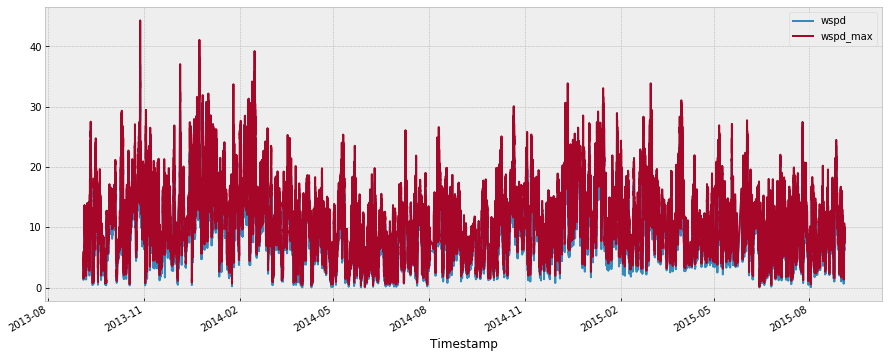

In [167]:
wind.loc[:, 'wspd':'wspd_max'].plot(figsize = (15, 6))

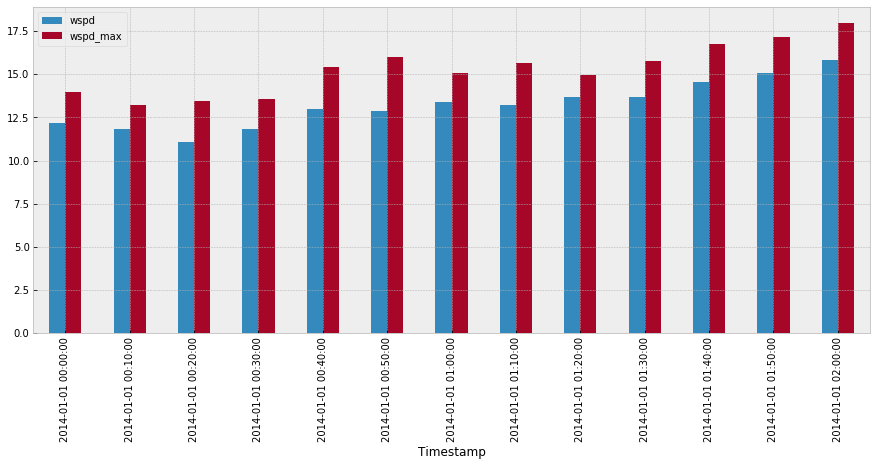

In [168]:
wind.loc['2014/01/01 00:00': '2014/01/01 02:00', 'wspd':'wspd_max'].plot(kind = 'bar', figsize = (15, 6))

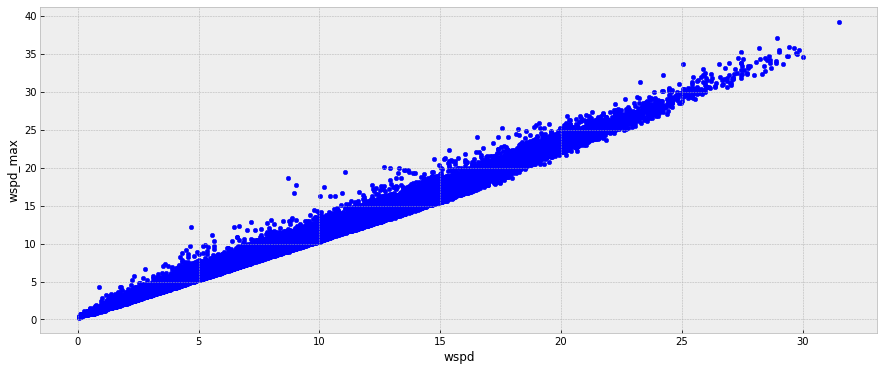

In [169]:
wind.loc['2014/01/01': '2014/12/31', 'wspd':'wspd_max'].plot(
    kind = 'scatter', 
    x = 'wspd',
    y = 'wspd_max',
    figsize = (15, 6)
)

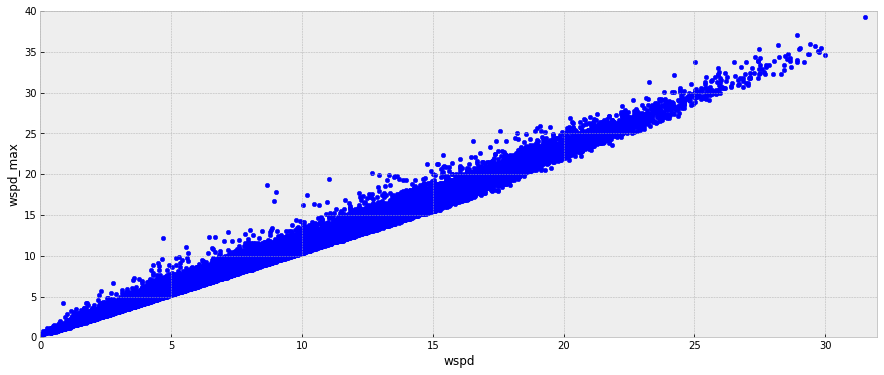

In [170]:
wind.loc['2014/01/01': '2014/12/31', 'wspd':'wspd_max'].plot(
    kind = 'scatter', 
    x = 'wspd',
    y = 'wspd_max',
    figsize = (15, 6),
    xlim = (0, 32),
    ylim = (0, 40)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000215D74A9668>,
      dtype=object)

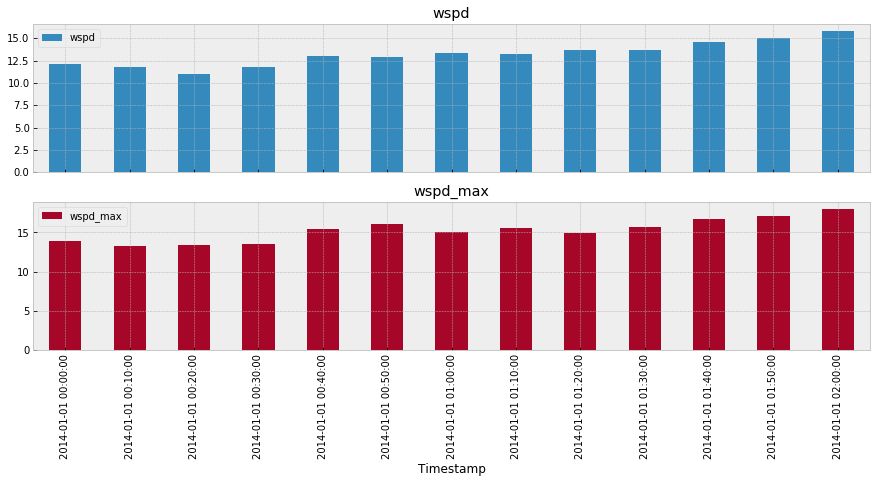

In [171]:
wind.loc['2014/01/01 00:00': '2014/01/01 02:00', 'wspd':'wspd_max'].plot(
    kind = 'bar', 
    figsize = (15, 6),
    subplots = True
)

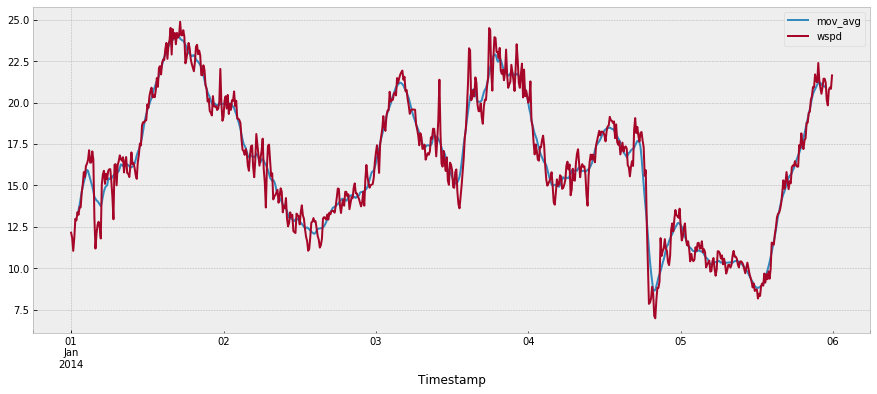

In [172]:
s1 = wind.loc['2014/01/01': '2014/01/05', 'wspd']
s2 = s1.rolling(13, center = True).mean()
tmp = pd.DataFrame({'wspd': s1, 'mov_avg': s2})
tmp.plot.line(figsize = (15, 6))

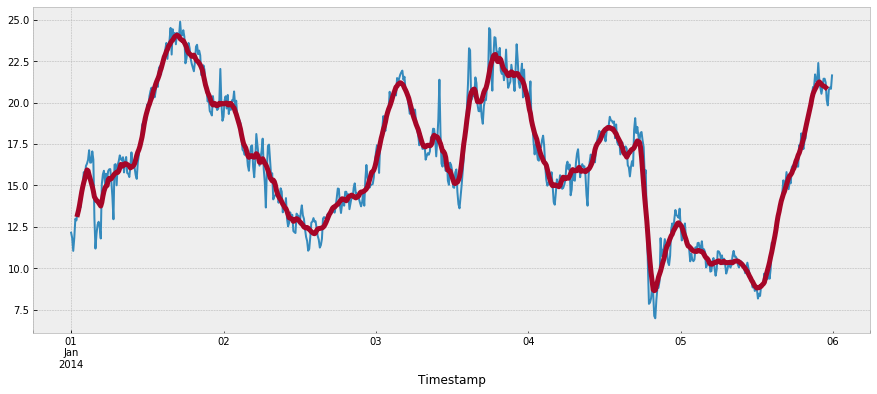

In [173]:
ax = tmp['wspd'].plot.line(figsize = (15, 6))
tmp['mov_avg'].plot.line(figsize = (15, 6), lw = 5, ax = ax)

In [174]:
possible = dir(pd.DataFrame.plot)
for p in possible:
    if '_' not in p: print(p)

area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


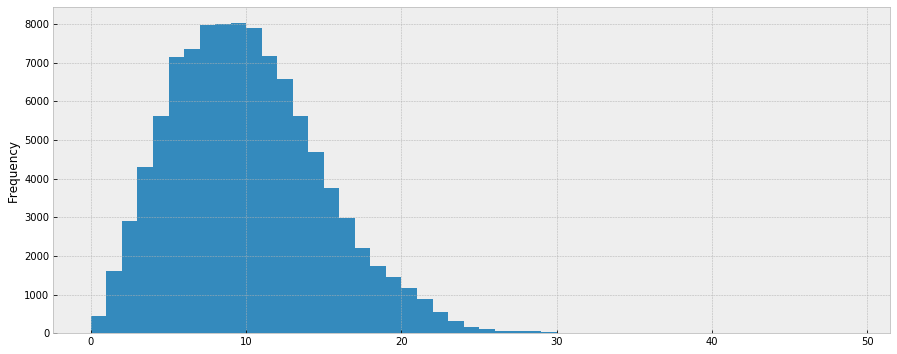

In [175]:
wind['wspd'].plot.hist(bins = np.arange(0, 50), figsize = (15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215DC0181D0>,
      dtype=object)

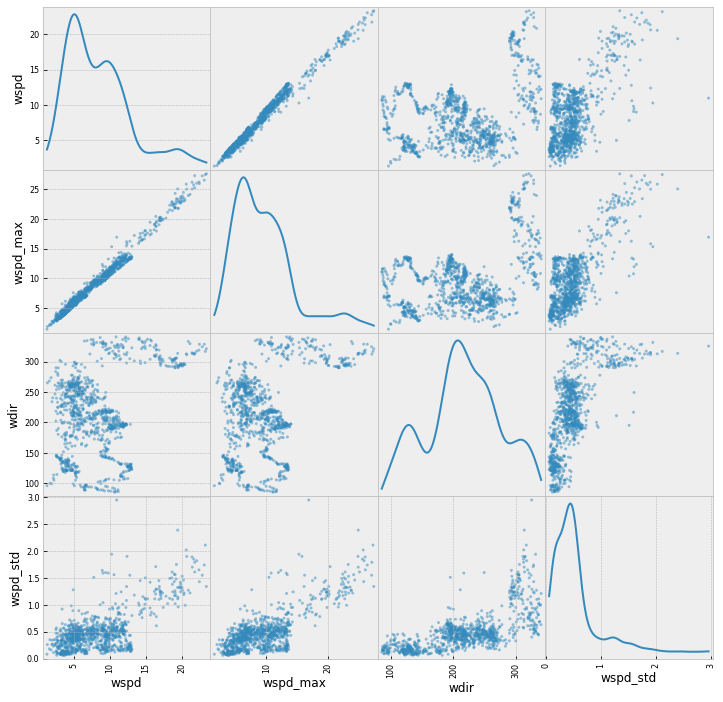

In [177]:
pd.plotting.scatter_matrix(
    wind.iloc[0:1000, :], 
    diagonal = 'kde',
    figsize = (12, 12)
)